In [1]:
# run the header that sets up the environment

if "already_run" not in globals():
    globals()["already_run"] = True
    
    %run header.ipynb
    load_packages()
    change_wordir()

colors, colours = colourblind_palette("own")

analysis = ""

model = "all"

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.30.0


In [4]:
base = "./figures"
conditions = [f"{base}/{name}" for name in ["cyclic_2021", "new_PSI", "latest_dev"]]
conditions

# Get all PNG files for each condition
images_by_condition = {cond: set(Path(cond).rglob("*.png")) for cond in conditions}
images_by_condition

# Extract relative paths for comparison
relpaths_by_condition = {
    cond: {img.relative_to(cond) for img in imgs}
    for cond, imgs in images_by_condition.items()
}

#relpaths_by_condition

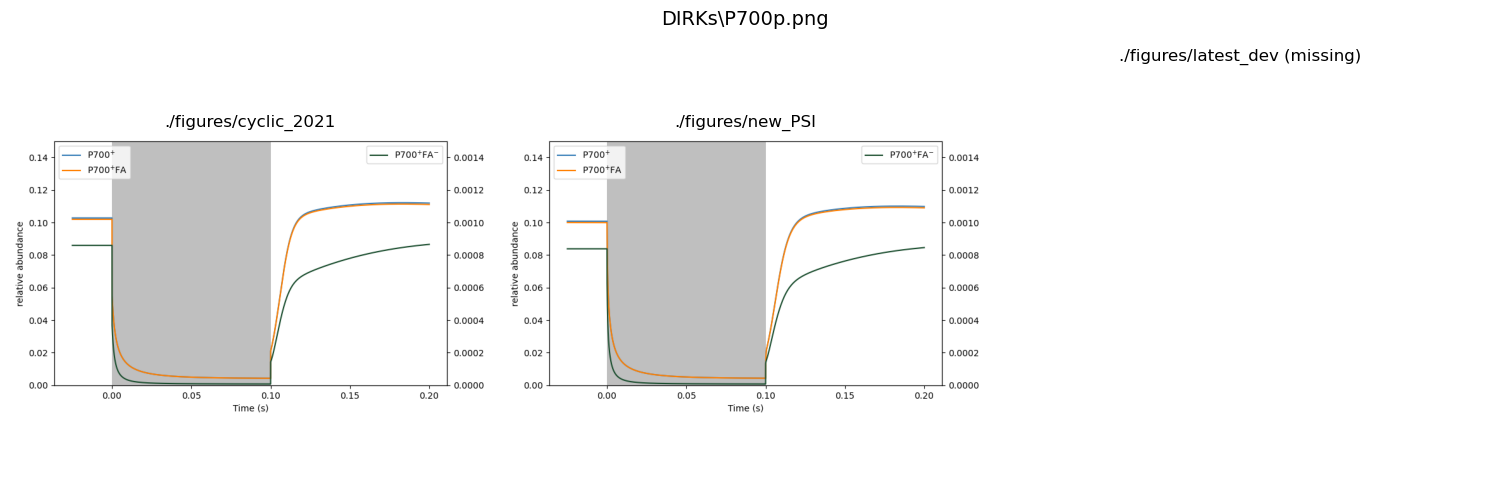

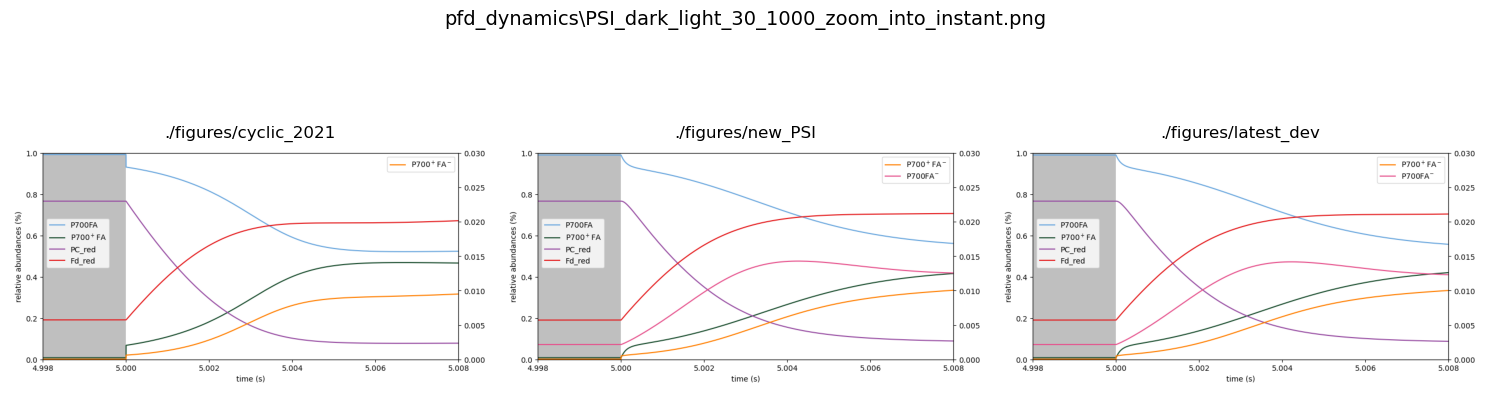

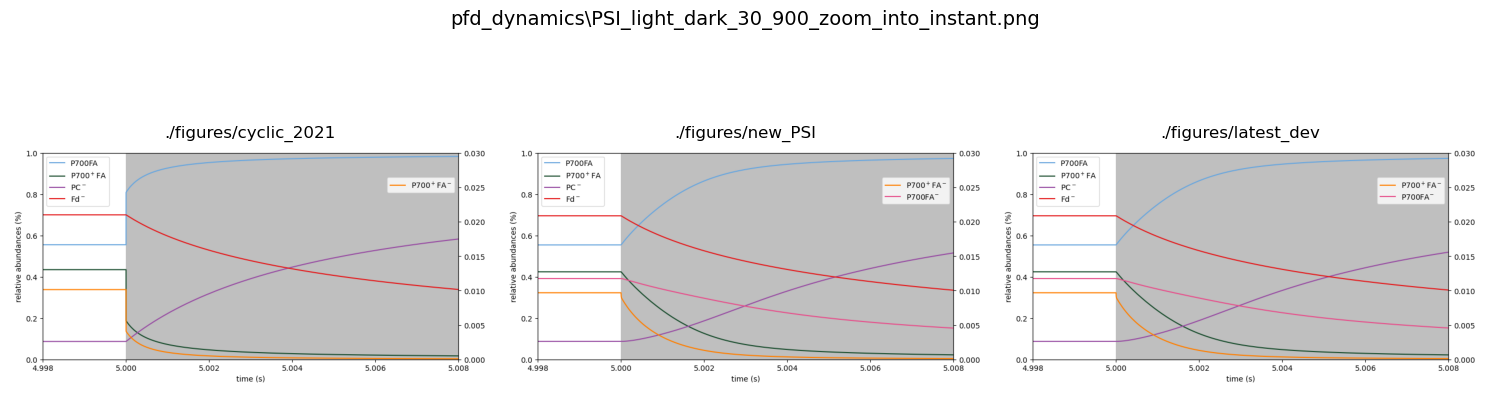

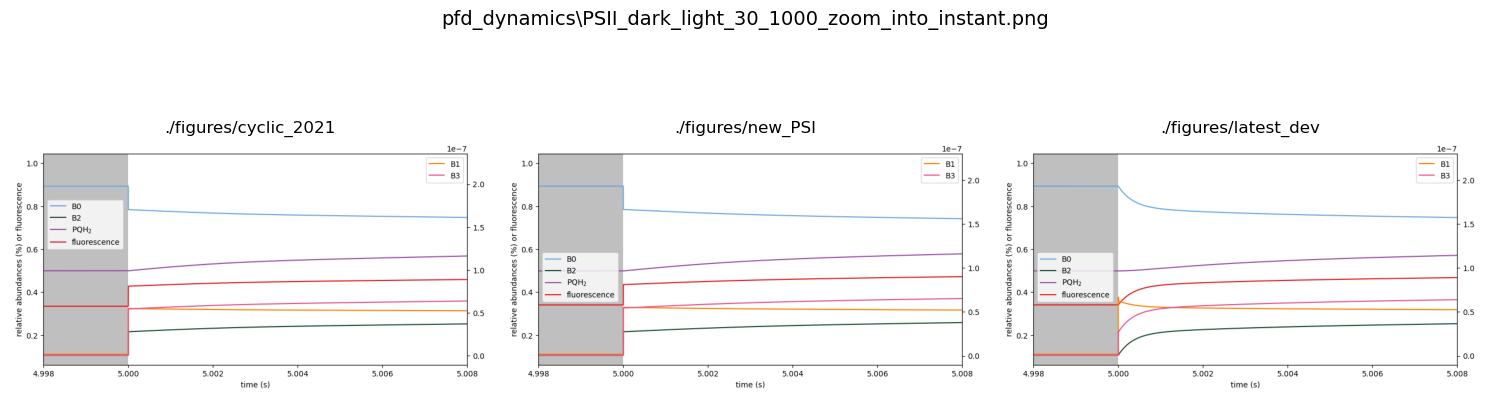

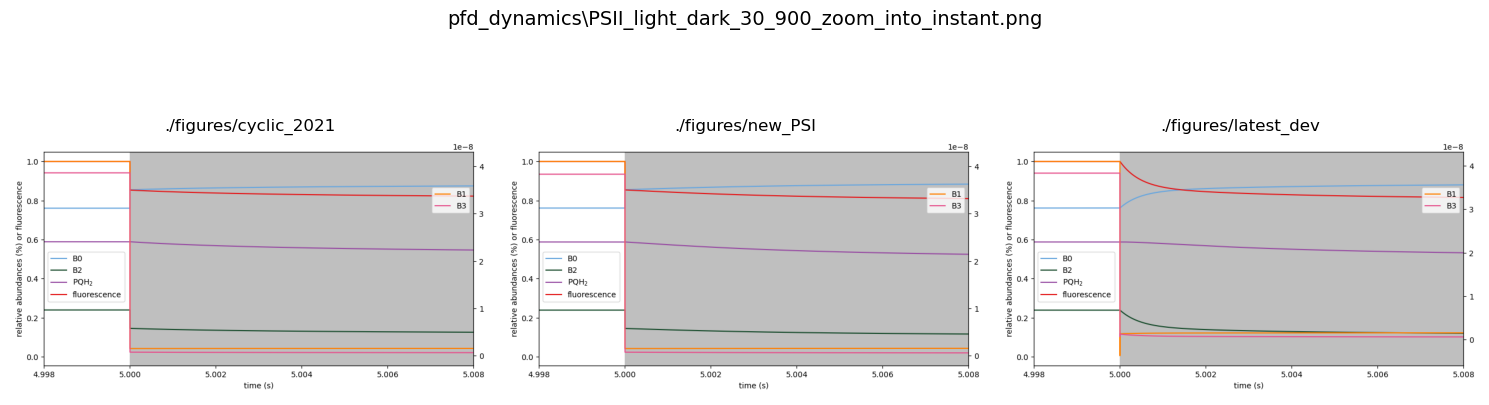

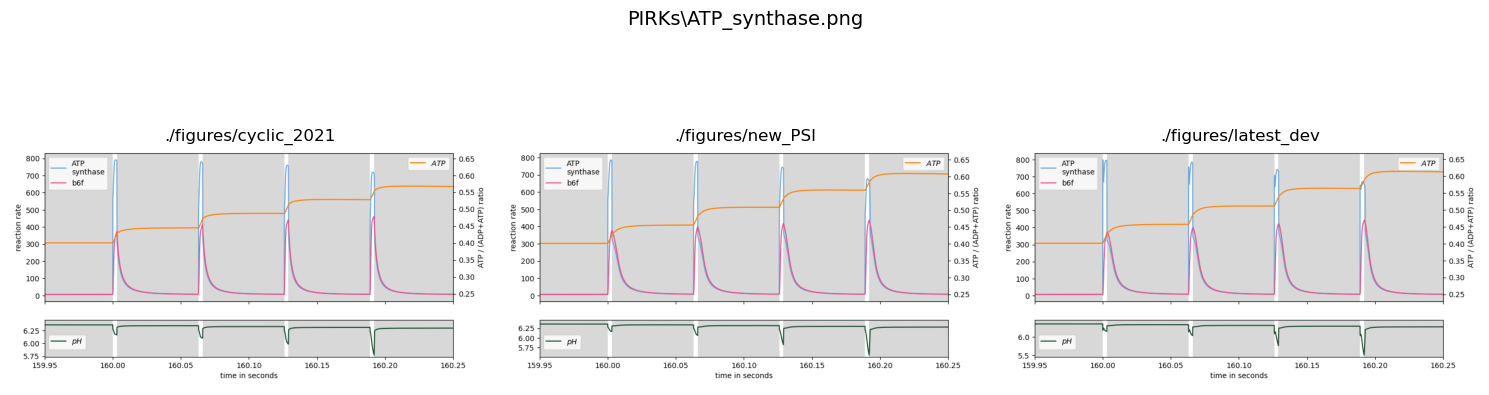

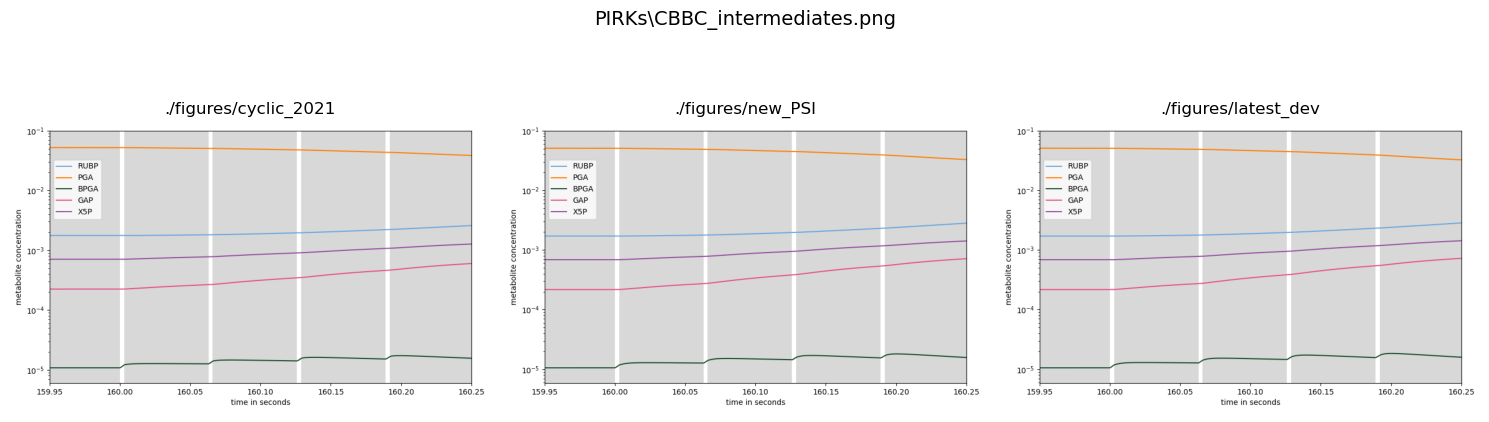

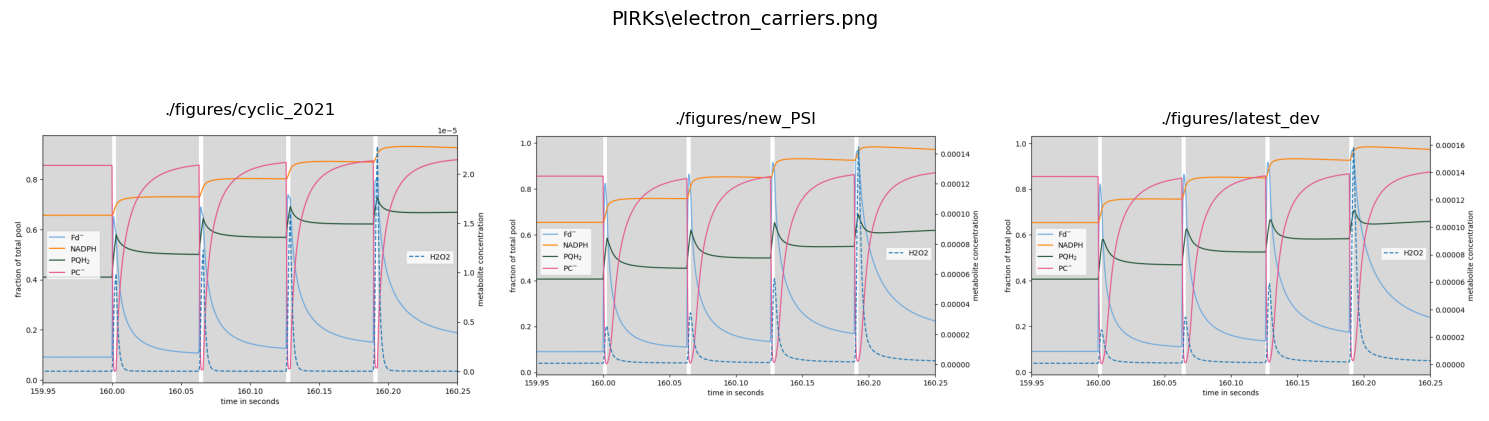

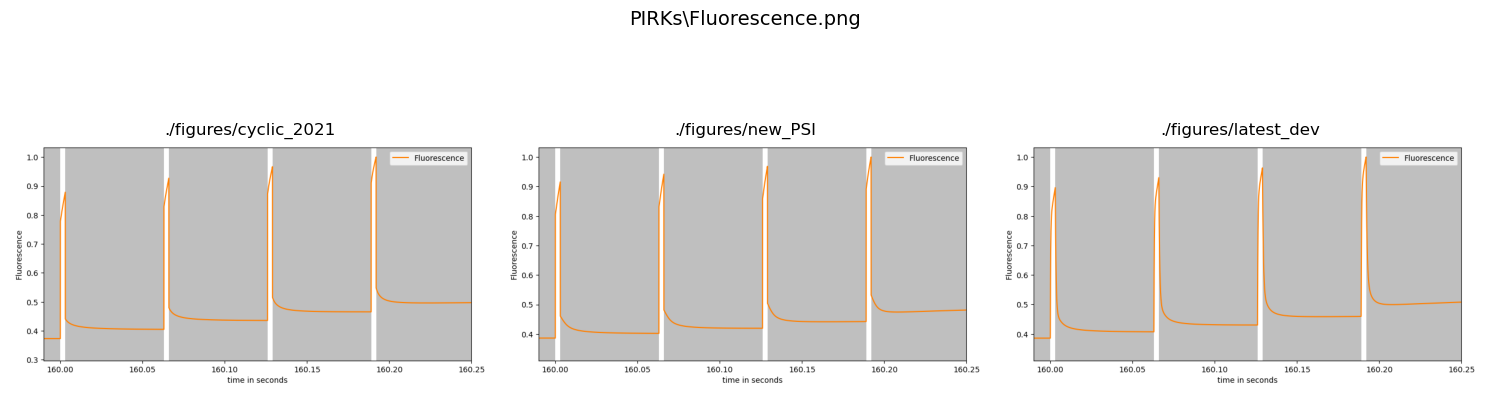

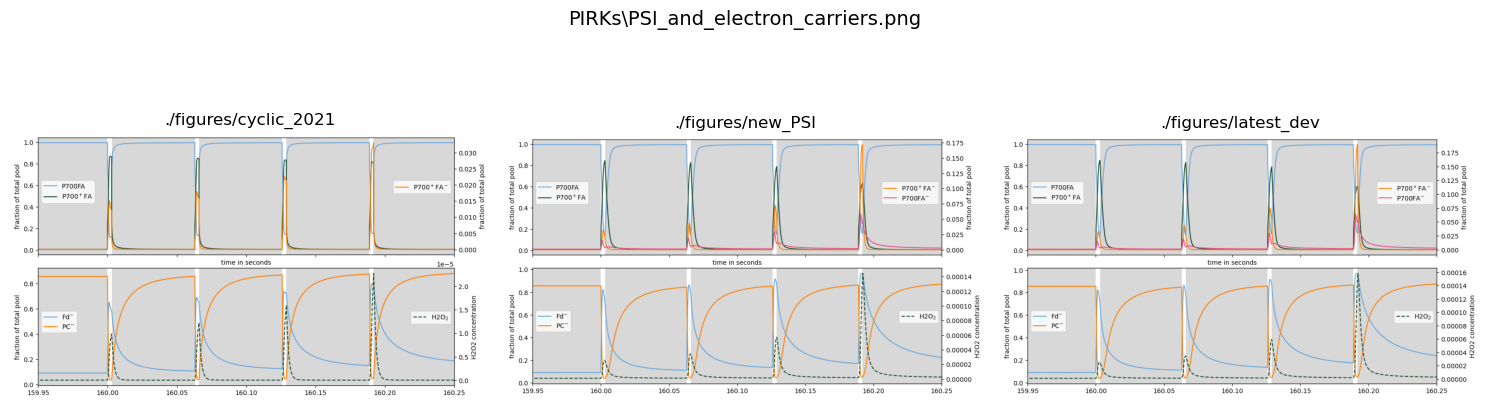

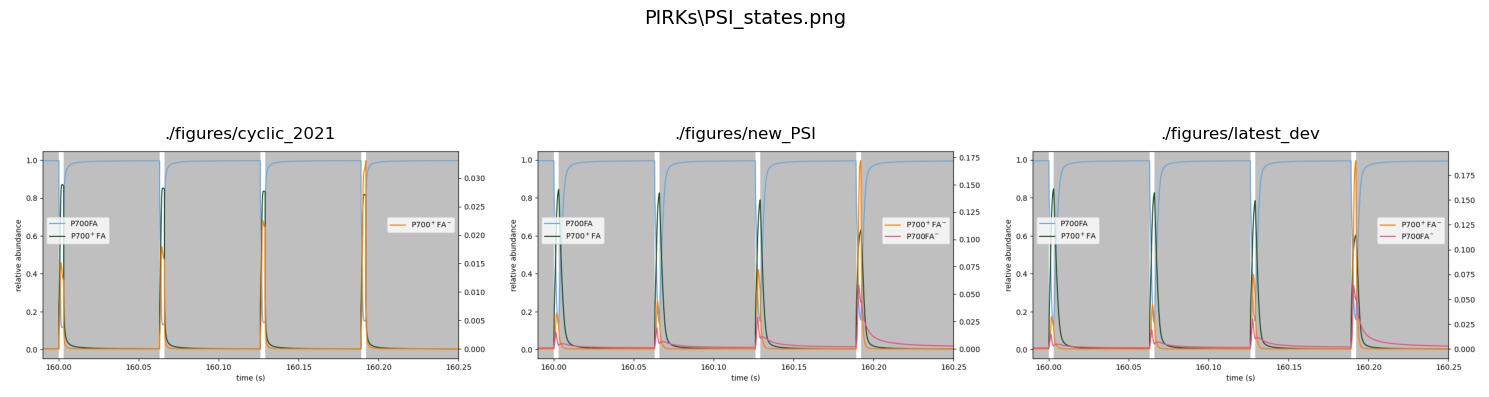

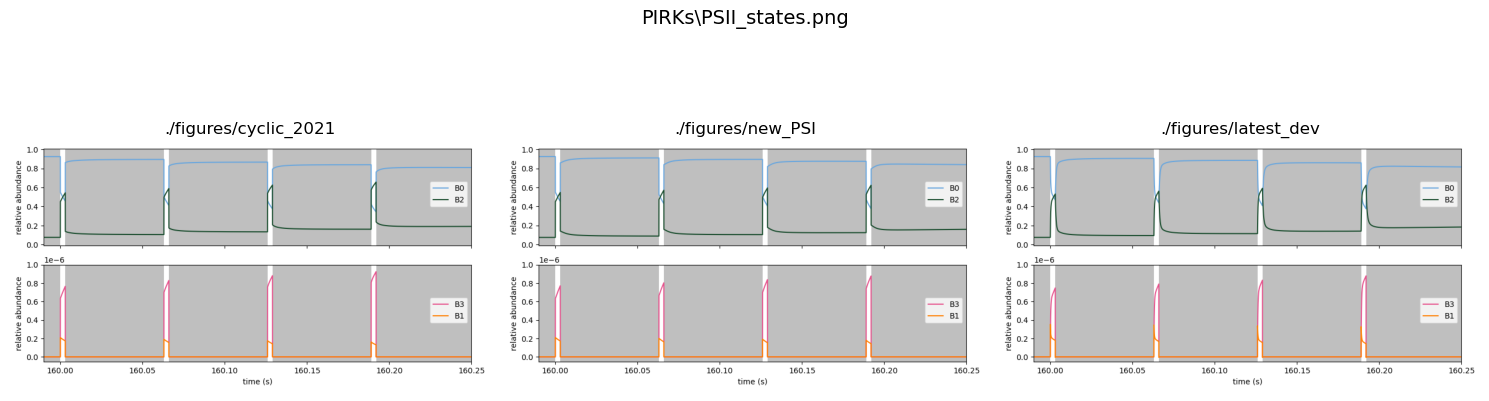

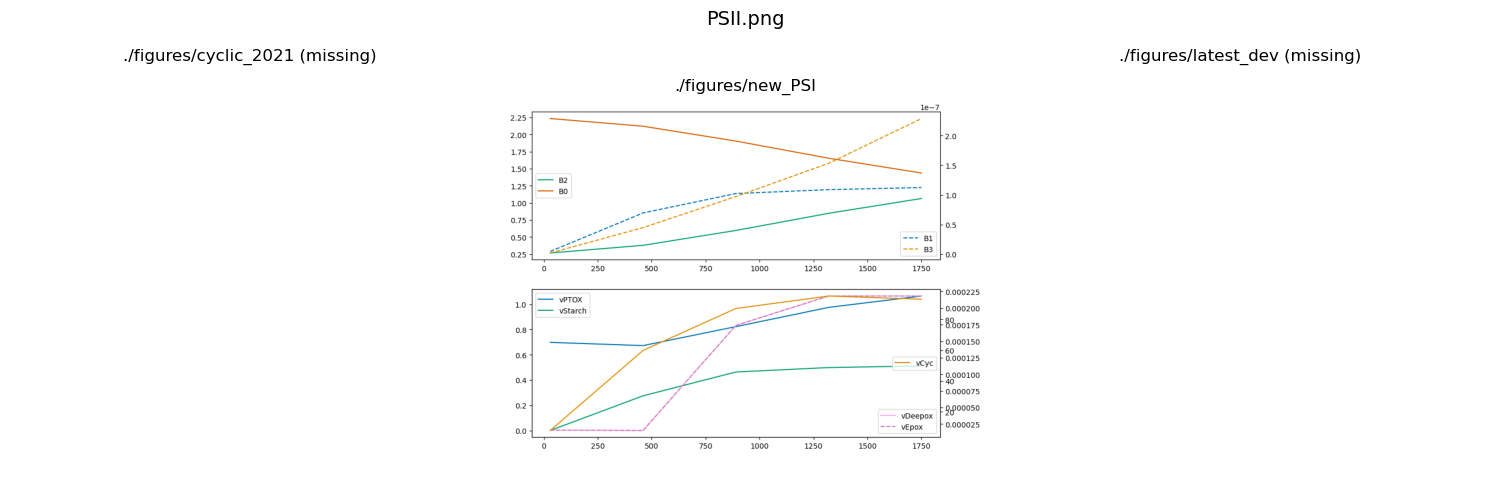

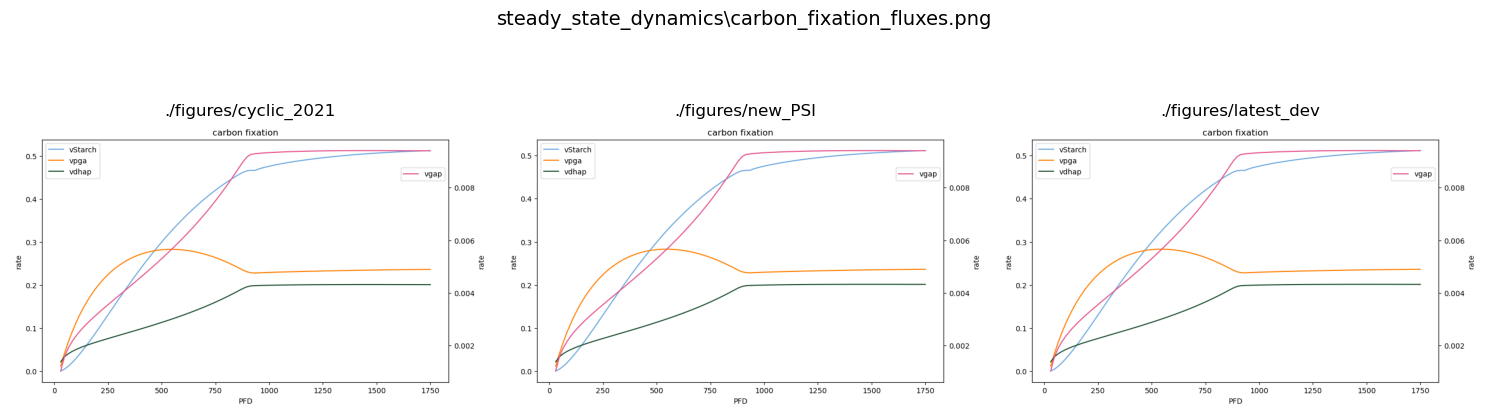

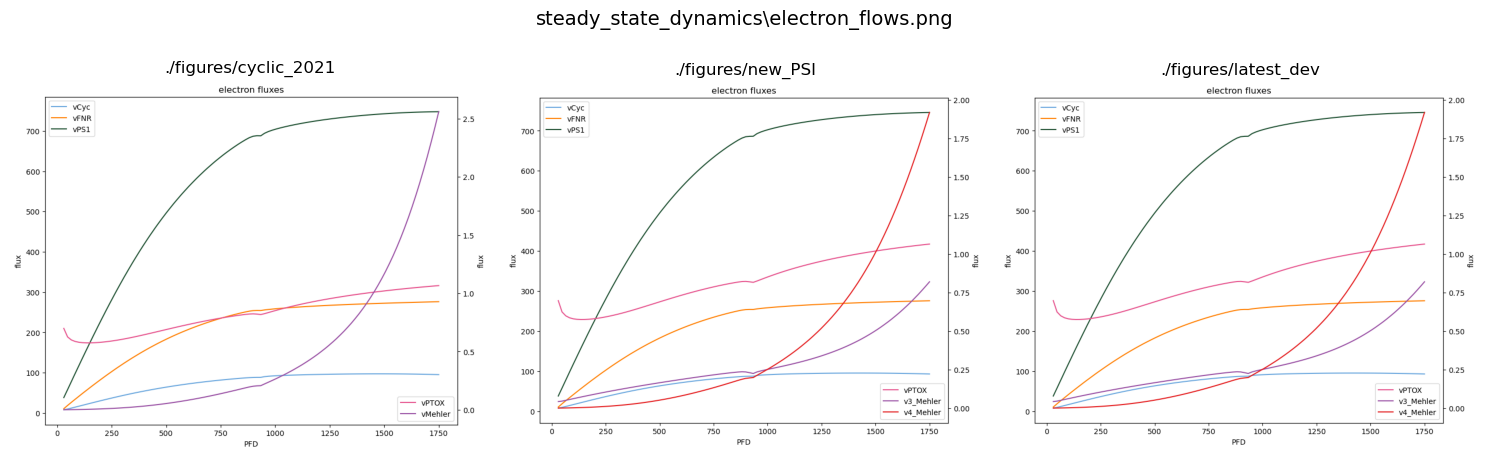

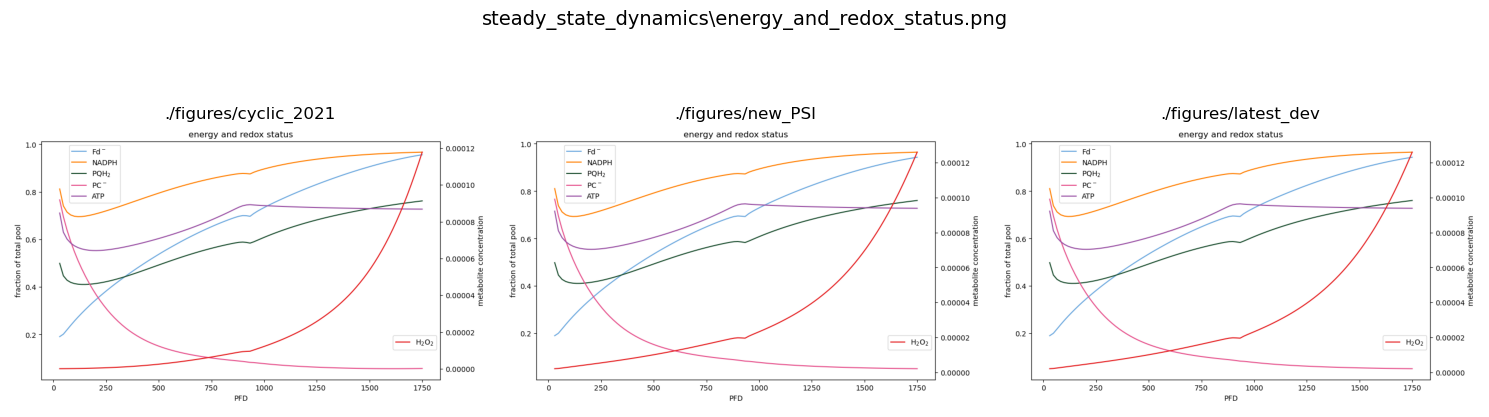

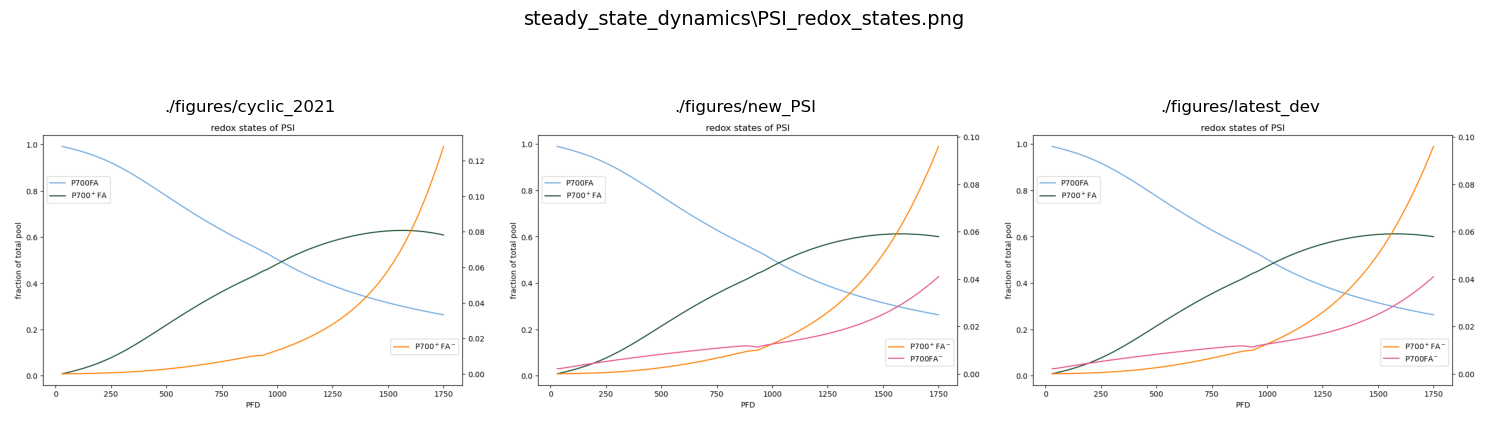

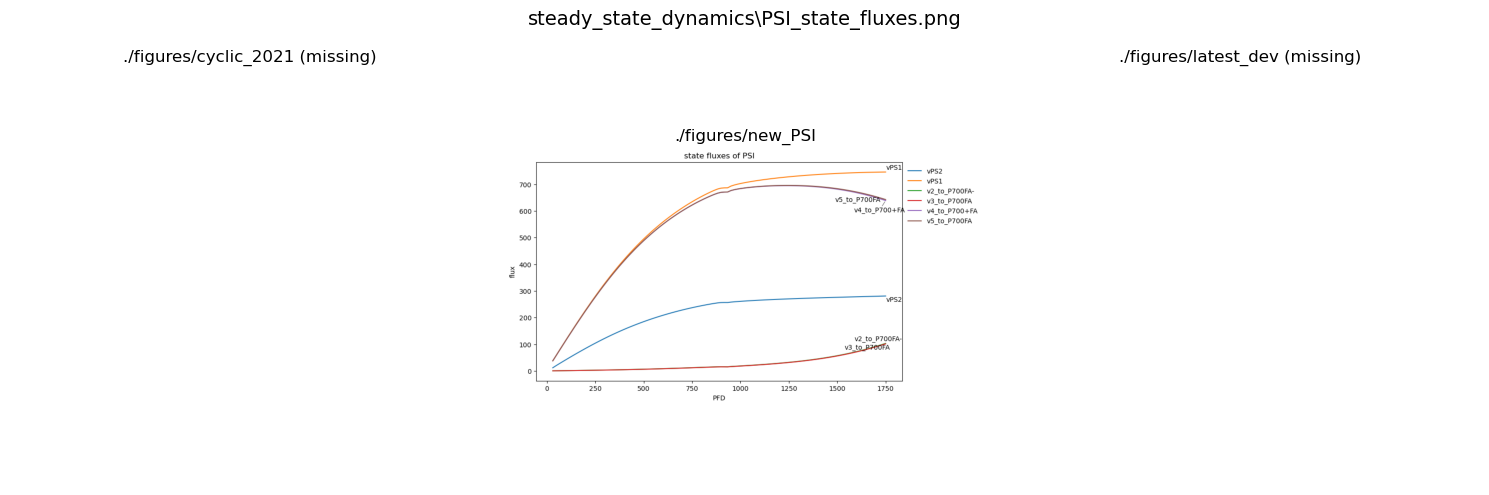

In [6]:
# Find all unique relative paths present in at least one condition
all_relpaths = set.union(*relpaths_by_condition.values())

# For each relative path, try to find and display the image from each condition
for relpath in sorted(all_relpaths):
    fig, axs = plt.subplots(1, len(conditions), figsize=(5 * len(conditions), 5))
    if len(conditions) == 1:
        axs = [axs]  # Ensure iterable

    for ax, cond in zip(axs, conditions):
        img_path = Path(cond) / relpath
        ax.axis("off")
        if img_path.exists():
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(cond)
        else:
            ax.set_title(f"{cond} (missing)")

    fig.suptitle(str(relpath), fontsize=14)
    plt.tight_layout()
    plt.show()
